In [ ]:
! pip install face_recognition

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 10.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566185 sha256=50a7d0be41c09e2ef392f11a866a8de7ee85e00f08bc96837a6473aa8a87714d
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [ ]:
import glob #used to search for files that have similar pattern. 
import torch #used to implement different Deep Learning techniques like CNN and transformers
import torchvision #provides pre trained models like ResNet

In [ ]:
#to load preprocessod video to memory
import json
import glob
import numpy as np
import cv2
import copy
import random
video_files =  glob.glob('/content/drive/MyDrive/Celeb-DF/Celeb-real/*.mp4')
video_files += glob.glob('/content/drive/MyDrive/Celeb-DF/Celeb-synthesis/*.mp4')
random.shuffle(video_files)
random.shuffle(video_files)
frame_count = []
for video_file in video_files: #filter out files that are not enough to train the model
  cap = cv2.VideoCapture(video_file) #read video file
  if(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))<100): #if frame count<100 then delete
    video_files.remove(video_file)
    continue
  frame_count.append(int(cap.get(cv2.CAP_PROP_FRAME_COUNT)))
print("frames are " , frame_count)
print("Total no of video: " , len(frame_count))
print('Average frame per video:',np.mean(frame_count))

frames are  [339, 479, 470, 330, 530, 345, 305, 461, 161, 322, 325, 446, 308, 459, 466, 307, 380, 308, 510, 295, 534, 437, 422, 387, 334, 458, 530, 298, 328, 274, 611, 314, 376, 437, 470, 412, 469, 247, 398, 363, 492, 445, 530, 372, 458, 499, 439, 361, 361, 274, 362, 365, 224, 400, 459, 398, 362, 327, 303, 439, 201, 496, 363, 318, 315, 467, 339, 477, 422, 316, 451, 410, 247, 428, 420, 439, 517, 458, 409, 303, 372, 479, 456, 740, 376, 272, 464, 330, 350, 314, 398, 422, 400, 361, 325, 459, 371, 445, 361, 401, 361, 380, 224, 311, 446, 311, 458, 412, 314, 345, 525, 381, 458, 398, 428, 302, 322, 390, 320, 530, 317, 397, 339, 224, 272, 458, 372, 497, 161, 376, 387, 461, 317, 420, 350, 570, 322, 464, 451, 365, 505, 458, 499, 477, 442, 415, 570, 428, 516, 302, 270, 630, 439, 380, 525, 334, 451, 317, 307, 364, 340, 570, 491, 334, 201, 224, 380, 400, 311, 325, 534, 352, 364, 201, 398, 505, 529, 428, 425, 372, 308, 364, 372, 491, 294, 445, 322, 272, 201, 343, 422, 311, 317, 306, 409, 505, 314, 37

In [ ]:
# load the video name and labels from csv
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import face_recognition
class video_dataset(Dataset):
    def __init__(self,video_names,labels,sequence_length = 60,transform = None):
        self.video_names = video_names#constructor
        self.labels = labels
        self.transform = transform
        self.count = sequence_length
    def __len__(self):
        return len(self.video_names)
    def __getitem__(self,idx):
        video_path = self.video_names[idx]
        frames = []
        a = int(100/self.count) #dividing the video in groups of no of frames selected
        first_frame = np.random.randint(0,a) #starting with any random group
        temp_video = video_path.split('/')[-1] 
        label = self.labels.iloc[(labels.loc[labels["file"] == temp_video].index.values[0]),1]
        if(label == '0'):
          label = 0
        if(label == '1'):
          label = 1
        for i,frame in enumerate(self.frame_extract(video_path)):
          frames.append(self.transform(frame))
          if(len(frames) == self.count):
            break
        frames = torch.stack(frames)
        frames = frames[:self.count]
        #print("length:" , len(frames), "label",label)
        return frames,label
    def frame_extract(self,path):
      vidObj = cv2.VideoCapture(path) 
      success = 1
      while success:
          success, image = vidObj.read()
          if success:
              yield image
#plot the image
def im_plot(tensor):
    image = tensor.cpu().numpy().transpose(1,2,0)
    b,g,r = cv2.split(image)
    image = cv2.merge((r,g,b))
    image = image*[0.22803, 0.22145, 0.216989] +  [0.43216, 0.394666, 0.37645]
    image = image*255.0
    plt.imshow(image.astype(int))
    plt.show()

In [ ]:
#count the number of fake and real videos
def number_of_real_and_fake_videos(data_list):
  header_list = ["file","label"]
  lab = pd.read_csv('/content/drive/MyDrive/Celeb-DF/dataset1.csv',names=header_list,skiprows=1)
          

# convert the column from string to int
  lab['label']=lab['label'].astype(int)

# check the new datatypes of each column
        #print(temp_video)
  fake = 0
  real = 0
  for i in data_list:
    temp_video = i.split('/')[-1]
    # print(temp_video,lab.loc[lab["file"] == temp_video])
    label = lab.iloc[(lab.loc[lab["file"] == temp_video].index.values[0]),1]
    if(label == '0'):
      fake=fake+1
    if(label == '1'):
      real=real+1
  return real,fake

Data Pre-processing

train :  762
test :  191
file     object
label     int64
dtype: object
file     object
label     int64
dtype: object
file     object
label     int64
dtype: object
file     object
label     int64
dtype: object
TRAIN:  Real: 0  Fake: 0
file     object
label     int64
dtype: object
file     object
label     int64
dtype: object
file     object
label     int64
dtype: object
file     object
label     int64
dtype: object
TEST:  Real: 0  Fake: 0


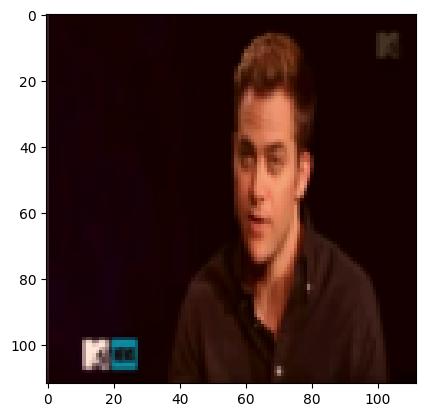

In [ ]:

import random
import pandas as pd
from sklearn.model_selection import train_test_split

header_list = ["file","label"]
labels = pd.read_csv('/content/drive/MyDrive/Celeb-DF/dataset1.csv',names=header_list,skiprows=1)
labels['label']=labels['label'].astype(int)
#print(labels)
train_videos = video_files[:int(0.8*len(video_files))]
valid_videos = video_files[int(0.8*len(video_files)):]
print("train : " , len(train_videos))
print("test : " , len(valid_videos))
# train_videos,valid_videos = train_test_split(data,test_size = 0.2)
# print(train_videos)
# print(number_of_real_and_fake_videos(train_videos))
print("TRAIN: ", "Real:",number_of_real_and_fake_videos(train_videos)[0], " Fake:",number_of_real_and_fake_videos(train_videos)[1])
print("TEST: ", "Real:",number_of_real_and_fake_videos(valid_videos)[0], " Fake:",number_of_real_and_fake_videos(valid_videos)[1])


im_size = 112 #size of input image to model
#for normalization so that the mean is zero and unit variance to get more accuracy
mean = [0.485, 0.456, 0.406] # mean-values of RGB
std = [0.229, 0.224, 0.225]

train_transforms = transforms.Compose([
                                        transforms.ToPILImage(),
                                        transforms.Resize((im_size,im_size)), 
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean,std)]) 

test_transforms = transforms.Compose([
                                        transforms.ToPILImage(),
                                        transforms.Resize((im_size,im_size)),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean,std)])
train_data = video_dataset(train_videos,labels,sequence_length = 10,transform = train_transforms)
#print(train_data)
val_data = video_dataset(valid_videos,labels,sequence_length = 10,transform = train_transforms)
train_loader = DataLoader(train_data,batch_size = 4,shuffle = True,num_workers = 2)# class in pytorch that helps with batch processing
valid_loader = DataLoader(val_data,batch_size = 4,shuffle = True,num_workers = 2)
image,label = train_data[0]
im_plot(image[0,:,:,:])

In [ ]:
#Model with feature visualization
import torch
from torch import nn
from torchvision import models
class Model(nn.Module):
    def __init__(self, num_classes,latent_dim= 2048, lstm_layers=1 , hidden_dim = 2048, bidirectional = False):
        super(Model, self).__init__()
        model = models.resnext50_32x4d(pretrained = True) #pre trained ResNet using torchvision
        self.model = nn.Sequential(*list(model.children())[:-2])#last 2 layers removed because those are used for object detection and adding layers 
        self.lstm = nn.LSTM(latent_dim,hidden_dim, lstm_layers,  bidirectional) #using LSTM layer that is bidirectional
        self.relu = nn.LeakyReLU() #leaky ReLU overcomes the the problem of dying ReLU which happens when the neuron isnt able to learn anymore
        self.dp = nn.Dropout(0.4) #dropout is implemented to avoid overfitting by dropping out neutrons
        self.linear1 = nn.Linear(2048,num_classes) #adding a linear layer to produce output
        self.avgpool = nn.AdaptiveAvgPool2d(1) # reduce the dimension to a single value to send it to LSTM
    def forward(self, x):
        batch_size,seq_length, c, h, w = x.shape
        x = x.view(batch_size * seq_length, c, h, w)
        fmap = self.model(x)
        x = self.avgpool(fmap)# reduces the dimension to 1X1
        x = x.view(batch_size,seq_length,2048)
        x_lstm,_ = self.lstm(x,None)
        return fmap,self.dp(self.linear1(torch.mean(x_lstm,dim = 1)))

In [ ]:
model = Model(2).cuda()
a,b = model(torch.from_numpy(np.empty((1,20,3,112,112))).type(torch.cuda.FloatTensor))

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNeXt50_32X4D_Weights.IMAGENET1K_V1`. You can also use `weights=ResNeXt50_32X4D_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
import torch
from torch.autograd import Variable
import time
import os
import sys
import os
def train_epoch(epoch, num_epochs, data_loader, model, criterion, optimizer):
    model.train()
    losses = AverageMeter()
    accuracies = AverageMeter()
    print(data_loader)
    t = []
    for i, (inputs, targets) in enumerate(data_loader):
        if torch.cuda.is_available():
            print(targets)
            # targets = torch.as_tensor(targets)
            targets = targets.type(torch.cuda.LongTensor)
            inputs = inputs.cuda()
        _,outputs = model(inputs)
        loss  = criterion(outputs,targets.type(torch.cuda.LongTensor))
        acc = calculate_accuracy(outputs, targets.type(torch.cuda.LongTensor))
        losses.update(loss.item(), inputs.size(0))
        accuracies.update(acc, inputs.size(0))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        sys.stdout.write(
                "\r[Epoch %d/%d] [Batch %d / %d] [Loss: %f, Acc: %.2f%%]"
                % (
                    epoch,
                    num_epochs,
                    i,
                    len(data_loader),
                    losses.avg,
                    accuracies.avg))
    torch.save(model.state_dict(),'/content/checkpoint.pt')
    return losses.avg,accuracies.avg
def test(epoch,model, data_loader ,criterion):
    print('Testing')
    model.eval()
    losses = AverageMeter()
    accuracies = AverageMeter()
    pred = []
    true = []
    count = 0
    with torch.no_grad():
        for i, (inputs, targets) in enumerate(data_loader):
            if torch.cuda.is_available():
                targets = targets.cuda().type(torch.cuda.FloatTensor)
                inputs = inputs.cuda()
            _,outputs = model(inputs)
            loss = torch.mean(criterion(outputs, targets.type(torch.cuda.LongTensor)))
            acc = calculate_accuracy(outputs,targets.type(torch.cuda.LongTensor))
            _,p = torch.max(outputs,1) 
            true += (targets.type(torch.cuda.LongTensor)).detach().cpu().numpy().reshape(len(targets)).tolist()
            pred += p.detach().cpu().numpy().reshape(len(p)).tolist()
            losses.update(loss.item(), inputs.size(0))
            accuracies.update(acc, inputs.size(0))
            sys.stdout.write(
                    "\r[Batch %d / %d]  [Loss: %f, Acc: %.2f%%]"
                    % (
                        i,
                        len(data_loader),
                        losses.avg,
                        accuracies.avg
                        )
                    )
        print('\nAccuracy {}'.format(accuracies.avg))
    return true,pred,losses.avg,accuracies.avg
class AverageMeter(object):
    """Computes and stores the average and current value"""
    def __init__(self):
        self.reset()
    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count
def calculate_accuracy(outputs, targets):
    batch_size = targets.size(0)

    _, pred = outputs.topk(1, 1, True)
    pred = pred.t()
    correct = pred.eq(targets.view(1, -1))
    n_correct_elems = correct.float().sum().item()
    return 100* n_correct_elems / batch_size

In [ ]:
import seaborn as sn
#Output confusion matrix
def print_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    print('True positive = ', cm[0][0])
    print('False positive = ', cm[0][1])
    print('False negative = ', cm[1][0])
    print('True negative = ', cm[1][1])
    print('\n')
    df_cm = pd.DataFrame(cm, range(2), range(2))
    sn.set(font_scale=1.4) # for label size
    sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
    plt.ylabel('Actual label', size = 20)
    plt.xlabel('Predicted label', size = 20)
    plt.xticks(np.arange(2), ['Fake', 'Real'], size = 16)
    plt.yticks(np.arange(2), ['Fake', 'Real'], size = 16)
    plt.ylim([2, 0])
    plt.show()
    calculated_acc = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+ cm[1][1])
    print("Calculated Accuracy",calculated_acc*100)

In [ ]:
def plot_loss(train_loss_avg,test_loss_avg,num_epochs):
  loss_train = train_loss_avg
  loss_val = test_loss_avg
  print(num_epochs)
  epochs = range(1,num_epochs+1)
  plt.plot(epochs, loss_train, 'g', label='Training loss')
  plt.plot(epochs, loss_val, 'b', label='validation loss')
  plt.title('Training and Validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()
def plot_accuracy(train_accuracy,test_accuracy,num_epochs):
  loss_train = train_accuracy
  loss_val = test_accuracy
  epochs = range(1,num_epochs+1)
  plt.plot(epochs, loss_train, 'g', label='Training accuracy')
  plt.plot(epochs, loss_val, 'b', label='validation accuracy')
  plt.title('Training and Validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

tensor([0, 0, 0, 0])
[Epoch 1/20] [Batch 0 / 191] [Loss: 0.659588, Acc: 75.00%]tensor([1, 0, 0, 1])
[Epoch 1/20] [Batch 1 / 191] [Loss: 0.669882, Acc: 75.00%]tensor([0, 0, 0, 0])
[Epoch 1/20] [Batch 2 / 191] [Loss: 0.664981, Acc: 75.00%]tensor([0, 0, 1, 0])
[Epoch 1/20] [Batch 3 / 191] [Loss: 0.649748, Acc: 75.00%]tensor([0, 0, 0, 0])
[Epoch 1/20] [Batch 4 / 191] [Loss: 0.632547, Acc: 80.00%]tensor([0, 0, 1, 0])
[Epoch 1/20] [Batch 5 / 191] [Loss: 0.655606, Acc: 75.00%]tensor([1, 0, 0, 0])
[Epoch 1/20] [Batch 6 / 191] [Loss: 0.645624, Acc: 75.00%]tensor([0, 0, 0, 0])
[Epoch 1/20] [Batch 7 / 191] [Loss: 0.630217, Acc: 75.00%]tensor([1, 0, 0, 0])
[Epoch 1/20] [Batch 8 / 191] [Loss: 0.623781, Acc: 75.00%]tensor([0, 0, 0, 0])
[Epoch 1/20] [Batch 9 / 191] [Loss: 0.602907, Acc: 77.50%]tensor([0, 0, 0, 0])
[Epoch 1/20] [Batch 10 / 191] [Loss: 0.585543, Acc: 79.55%]tensor([0, 0, 0, 1])
[Epoch 1/20] [Batch 11 / 191] [Loss: 0.601110, Acc: 79.17%]tensor([0, 0, 0, 0])
[Epoch 1/20] [Batch 12 / 191]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fd184a66560>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1479, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1462, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: 

[Epoch 5/20] [Batch 55 / 191] [Loss: 0.480933, Acc: 81.70%]

can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fd184a66560>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1479, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1462, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


tensor([0, 0, 0, 0])
[Epoch 5/20] [Batch 56 / 191] [Loss: 0.477118, Acc: 82.02%]tensor([0, 1, 0, 0])
[Epoch 5/20] [Batch 57 / 191] [Loss: 0.475152, Acc: 81.90%]tensor([0, 0, 0, 0])
[Epoch 5/20] [Batch 58 / 191] [Loss: 0.469381, Acc: 82.20%]tensor([0, 0, 1, 0])
[Epoch 5/20] [Batch 59 / 191] [Loss: 0.468192, Acc: 82.08%]tensor([0, 0, 0, 0])
[Epoch 5/20] [Batch 60 / 191] [Loss: 0.464712, Acc: 82.38%]tensor([0, 0, 0, 0])
[Epoch 5/20] [Batch 61 / 191] [Loss: 0.459076, Acc: 82.66%]tensor([0, 0, 0, 0])
[Epoch 5/20] [Batch 62 / 191] [Loss: 0.453740, Acc: 82.94%]tensor([0, 0, 0, 0])
[Epoch 5/20] [Batch 63 / 191] [Loss: 0.450510, Acc: 83.20%]tensor([0, 0, 0, 0])
[Epoch 5/20] [Batch 64 / 191] [Loss: 0.449114, Acc: 83.46%]tensor([0, 0, 0, 0])
[Epoch 5/20] [Batch 65 / 191] [Loss: 0.447845, Acc: 83.71%]tensor([0, 0, 1, 0])
[Epoch 5/20] [Batch 66 / 191] [Loss: 0.450936, Acc: 83.58%]tensor([1, 0, 0, 0])
[Epoch 5/20] [Batch 67 / 191] [Loss: 0.451673, Acc: 83.46%]tensor([0, 0, 0, 0])
[Epoch 5/20] [Batch

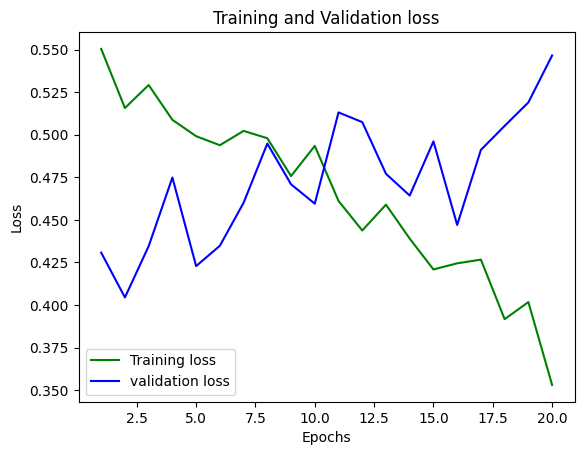

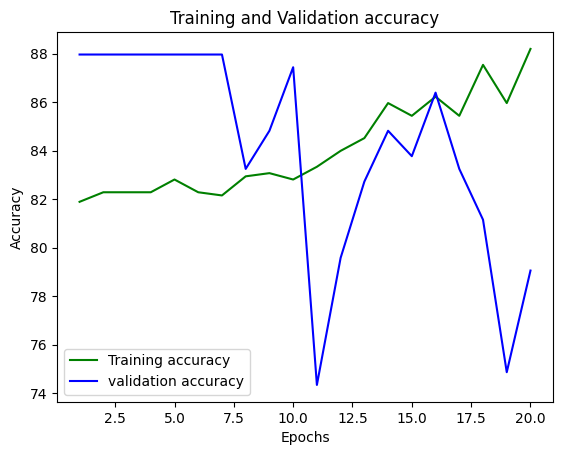

[[149  19]
 [ 21   2]]
True positive =  149
False positive =  19
False negative =  21
True negative =  2




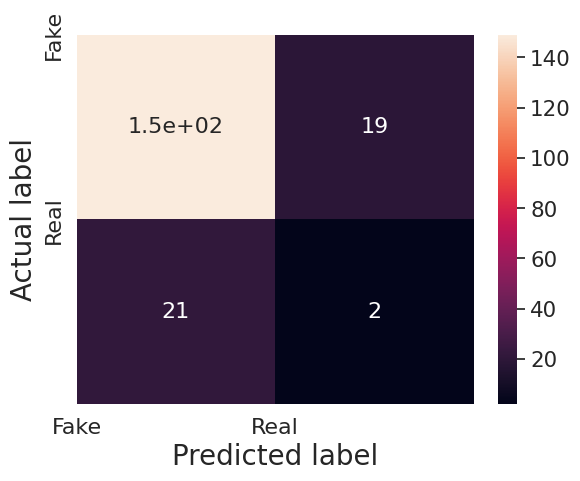

Calculated Accuracy 79.05759162303664


In [ ]:
from sklearn.metrics import confusion_matrix
#learning rate
lr = 1e-5#0.001
#number of epochs 
num_epochs = 20
pin_memory=True

optimizer = torch.optim.Adam(model.parameters(), lr= lr,weight_decay = 1e-5)

#class_weights = torch.from_numpy(np.asarray([1,15])).type(torch.FloatTensor).cuda()
#criterion = nn.CrossEntropyLoss(weight = class_weights).cuda()
criterion = nn.CrossEntropyLoss().cuda()
train_loss_avg =[]
train_accuracy = []
test_loss_avg = []
test_accuracy = []
for epoch in range(1,num_epochs+1):
    l, acc = train_epoch(epoch,num_epochs,train_loader,model,criterion,optimizer)
    train_loss_avg.append(l)
    train_accuracy.append(acc)
    true,pred,tl,t_acc = test(epoch,model,valid_loader,criterion)
    test_loss_avg.append(tl)
    test_accuracy.append(t_acc)
plot_loss(train_loss_avg,test_loss_avg,len(train_loss_avg))
plot_accuracy(train_accuracy,test_accuracy,len(train_accuracy))
print(confusion_matrix(true,pred))
print_confusion_matrix(true,pred)

PREDICTION

In [ ]:
#import libraries

import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import face_recognition

In [ ]:
#import libraries
import torch
from torch.autograd import Variable
import time
import os
import sys
import os
from torch import nn
from torchvision import models

In [ ]:
#Model with feature visualization
from torch import nn
from torchvision import models
class Model(nn.Module):
    def __init__(self, num_classes,latent_dim= 2048, lstm_layers=1 , hidden_dim = 2048, bidirectional = False):
        super(Model, self).__init__()
        model = models.resnext50_32x4d(pretrained = True)
        self.model = nn.Sequential(*list(model.children())[:-2])
        self.lstm = nn.LSTM(latent_dim,hidden_dim, lstm_layers,  bidirectional)
        self.relu = nn.LeakyReLU()
        self.dp = nn.Dropout(0.4)
        self.linear1 = nn.Linear(2048,num_classes)
        self.avgpool = nn.AdaptiveAvgPool2d(1)
    def forward(self, x):
        batch_size,seq_length, c, h, w = x.shape
        x = x.view(batch_size * seq_length, c, h, w)
        fmap = self.model(x)
        x = self.avgpool(fmap)
        x = x.view(batch_size,seq_length,2048)
        x_lstm,_ = self.lstm(x,None)
        return fmap,self.dp(self.linear1(x_lstm[:,-1,:]))

In [ ]:
im_size = 112
mean=[0.485, 0.456, 0.406]
std=[0.229, 0.224, 0.225]
sm = nn.Softmax()
inv_normalize =  transforms.Normalize(mean=-1*np.divide(mean,std),std=np.divide([1,1,1],std))
def im_convert(tensor):
    """ Display a tensor as an image. """
    image = tensor.to("cpu").clone().detach()
    image = image.squeeze()
    image = inv_normalize(image)
    image = image.numpy()
    image = image.transpose(1,2,0)
    image = image.clip(0, 1)
    cv2.imwrite('./2.png',image*255)
    return image

def predict(model,img,path = './'):
  fmap,logits = model(img.to('cuda'))
  params = list(model.parameters())
  weight_softmax = model.linear1.weight.detach().cpu().numpy()
  logits = sm(logits)
  _,prediction = torch.max(logits,1)
  confidence = logits[:,int(prediction.item())].item()*100
  print('confidence of prediction:',logits[:,int(prediction.item())].item()*100)
  idx = np.argmax(logits.detach().cpu().numpy())
  bz, nc, h, w = fmap.shape
  out = np.dot(fmap[-1].detach().cpu().numpy().reshape((nc, h*w)).T,weight_softmax[idx,:].T)
  predict = out.reshape(h,w)
  predict = predict - np.min(predict)
  predict_img = predict / np.max(predict)
  predict_img = np.uint8(255*predict_img)
  out = cv2.resize(predict_img, (im_size,im_size))
  heatmap = cv2.applyColorMap(out, cv2.COLORMAP_JET)
  img = im_convert(img[:,-1,:,:,:])
  result = heatmap * 0.5 + img*0.8*255
  cv2.imwrite('/content/1.png',result)
  result1 = heatmap * 0.5/255 + img*0.8
  r,g,b = cv2.split(result1)
  result1 = cv2.merge((r,g,b))
  plt.imshow(result1)
  plt.show()
  return [int(prediction.item()),confidence]
#img = train_data[100][0].unsqueeze(0)
#predict(model,img)

In [ ]:
#!pip3 install face_recognition
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import face_recognition
class validation_dataset(Dataset):
    def __init__(self,video_names,sequence_length = 60,transform = None):
        self.video_names = video_names
        self.transform = transform
        self.count = sequence_length
    def __len__(self):
        return len(self.video_names)
    def __getitem__(self,idx):
        video_path = self.video_names[idx]
        frames = []
        a = int(100/self.count)
        first_frame = np.random.randint(0,a)      
        for i,frame in enumerate(self.frame_extract(video_path)):
            #if(i % a == first_frame):
            faces = face_recognition.face_locations(frame)
            try:
              top,right,bottom,left = faces[0]
              frame = frame[top:bottom,left:right,:]
            except:
              pass
            frames.append(self.transform(frame))
            if(len(frames) == self.count):
              break
        #print("no of frames",len(frames))
        frames = torch.stack(frames)
        frames = frames[:self.count]
        return frames.unsqueeze(0)
    def frame_extract(self,path):
      vidObj = cv2.VideoCapture(path) 
      success = 1
      while success:
          success, image = vidObj.read()
          if success:
              yield image
def im_plot(tensor):
    image = tensor.cpu().numpy().transpose(1,2,0)
    b,g,r = cv2.split(image)
    image = cv2.merge((r,g,b))
    image = image*[0.22803, 0.22145, 0.216989] +  [0.43216, 0.394666, 0.37645]
    image = image*255.0
    plt.imshow(image.astype(int))
    plt.show()

/content/drive/MyDrive/Celeb-DF/Celeb-synthesis/id0_id16_0006.mp4


<ipython-input-132-df0db4bf4c35>:21: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  logits = sm(logits)


confidence of prediction: 75.76614618301392


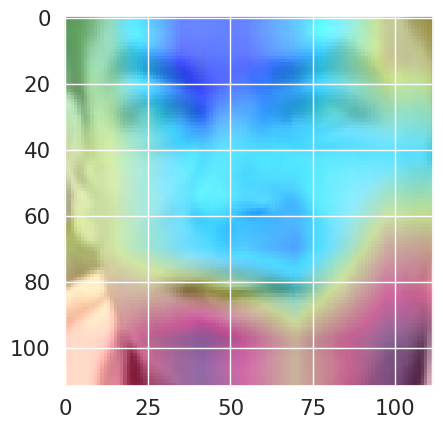

FAKE


In [ ]:
#Code for making prediction
im_size = 112
mean=[0.485, 0.456, 0.406]
std=[0.229, 0.224, 0.225]

train_transforms = transforms.Compose([
                                        transforms.ToPILImage(),
                                        transforms.Resize((im_size,im_size)),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean,std)])

path_to_videos =  [
                  '/content/drive/MyDrive/Celeb-DF/Celeb-synthesis/id0_id16_0006.mp4'
                  ]

video_dataset = validation_dataset(path_to_videos,sequence_length = 20,transform = train_transforms)
# model = Model(2).cuda()
# path_to_model = '/content/drive/My Drive/Models/model_87_acc_20_frames_final_data.pt'
# model.load_state_dict(torch.load(path_to_model))
model.eval()
for i in range(0,len(path_to_videos)):
  print(path_to_videos[i])
  prediction = predict(model,video_dataset[i],'./')
  if prediction[0] == 1:
    print("REAL")
  else:
    print("FAKE")